#**Elliptic Curve Cryptography (ECC)** [Prepared by Jevin Evans and Muhammad Ismail]
---

**Elliptic Curve Cryptography** (ECC) is an approach to cryptography that uses elliptic curves over a finite field. ECC uses points on a graph to encrypt and decrypt messages between parties. The following is an example of Elliptic Curve Cryptography simulating the Elgamal scheme. This lab will present different operations used in the scheme, including curve creation, key generation, encryption, and decryption.

##**Instructions** 
Run in order by hitting the play button next to each code box, or in the <u>menu bar</u>, select **Runtime->Run All** to run the whole lab.

In [ ]:
#@title Elliptic Message
#@markdown Insert a message that you want to encrypt or use the example.

PLAINTEXT = "This is an example of Elliptic Curve Cryptography." #@param {type:"string"}

from random import randint
from math import sqrt
import matplotlib.pyplot as plt



# Operations on Elliptic Curves
---

This scheme of ECC used is over GF(p) or a finite field. Simply put, operations with points are done modulo a number **p**. The number **p** is usually a prime number because of its strength in cryptography. 

First, let us get an understanding of the operations that will be needed in ECC:

- Modular Multiplicative Inverse
- Elliptic Curve Equation
- Point Addition
- Multiplication
- Additive Inverses

## Modular Multiplicative Inverse

Given a number a and a modulo m, the modular multiplicative inverse of a is b such that a∗b≡1( mod m).

In [ ]:
# Returns the modulo inverse of a number
def modInverse(num, prime):
  num = num % prime
  for x in range(1, prime):
    if (num * x) % prime == 1:
      return x
  return 1

## Elliptic Curve Formula
The formula for an elliptic curve over a finite field GF(p) is: 

$ y^2 = x^3 + Ax + B$, where x is from 0 to **p**. 

This is a unique set of elliptic curves that are used only real numbers, called **nonsingular elliptic curves**. Nonsingular elliptic curves have three distinct roots (real or complex). The parameters A and B determine whether the curve is singular or nonsingular and can be checked with the discriminant such that if $4A^3 + 27B^2 \neq 0$, then the curve is nonsingular. 

For the rest of the example, the following parameters will be used:

In [ ]:
# Given an x value returns the correspoding y for an Ellitpic Curve over GF(p)
def eccEquation(X:int, a:int,b:int, prime:int):
  return sqrt((X**3 + a*X + b) % prime)

def nonSingularCheck(a, b):
  return 4*a**3 + 27*b**2 != 0

PRIME = 641
A = 286
B = 18

print(f"Parameters: \n\tPrime/p = {PRIME}\n\tA = {A}, \n\tB = {B}")
print(f"\nNonsingular Equations: {nonSingularCheck(A, B)}")
print(f"With these parameters the graph will be E({A}, {B}) GF({PRIME})")


Parameters: 
	Prime/p = 641
	A = 286, 
	B = 18

Nonsingular Equations: True
With these parameters the graph will be E(286, 18) GF(641)


## Point Addition
Adding two points on an ECC graph will produce another point on the graph. These additions operations fall into 1 of 3 cases: 

### 1. Adding Distinct Points
Given two distinct points, $P(x_1,y_1)$ and $Q(x_2,y_2)$, the following equations are used to find the resulting point:
> $\lambda = (y_2 - y_1)/(x_2 - x_1)$ <br >
$x_3 = \lambda^2 - x_1 - x_2$ <br >
$y_3 = \lambda(x_1 - x_3) - y_1 $

### 2. Adding Identical Points
Given two points, $P(x_1,y_1)$ and $P(x_1,y_1)$, such that they are identical, the resulting point is found with the following equations:
>$\lambda = (3x^{2}_1 + A)/(2y_1) $<br >
$x_3 = \lambda^2 - x_1 - x_2$ <br >
$y_3 = \lambda(x_1 - x_3) - y_1 $

### 3. Adding Inverse Points
Two points are additive inverses of one another if $P(x_1,y_1)$ and $Q(x_1,-y_1)$ and are reflected across the x-axis. The addition of any inverse points would be the point at *infinity* and will not be on the graph.

In [ ]:
def addPoints(P:tuple, Q:tuple, prime:int, A:int=0):
  x = y = 0
  # Adding Same Point
  if P[0] == Q[0] and P[1] == Q[1]: 
    lam = ((3*(P[0]**2) + A) * modInverse((2*P[1]), prime)) % prime
  # Adding two distinct points
  else: 
    lam = ((Q[1] - P[1]) * modInverse((Q[0] - P[0]), prime)) % prime
  x = (lam**2 - P[0] - Q[0]) % prime
  y = (lam*(P[0] - x) - P[1]) % prime
  return (x,y)


## Point Multiplication
 Point multiplication is multiplying a point *P* by a constant *r*, which is the equivalent to the repeated addition of point *P*, *r* times. 

In [ ]:
def multiplyPoints(P:tuple, multiply:int, prime:int, A:int):
  Q = P
  for x in range(multiply-1):
    Q = addPoints(Q, P, prime, A)
  return Q


examplePoint = (2,6)
print(f"Given the example graph E(A,B) GF(p) = E(1, 0) GF(193) and the point, {examplePoint}")
print(f"{examplePoint}*3 = {multiplyPoints(examplePoint, 3, 13, 1)}")
multipleAddition = addPoints(examplePoint, examplePoint, 13, 1)
multipleAddition = addPoints(multipleAddition, examplePoint, 13, 1)
print(f"{examplePoint} + {examplePoint} + {examplePoint} = {multipleAddition}")

Given the example graph E(A,B) GF(p) = E(1, 0) GF(193) and the point, (2, 6)
(2, 6)*3 = (6, 12)
(2, 6) + (2, 6) + (2, 6) = (6, 12)


## Additive Inverse
Given a point $P(x_1,y_1)$, the additive inverse of $P(x_1,y_1)$ is the additive inverse of y such that $P(x_1,-y_1)$. 

For example, given the GF(17) and the point $P(3,6)$. The additive inverse of $6 $ mod $17 \equiv -6$ mod $17 \equiv 11$. So the inverse point would be $Q(3,11)$.

In [ ]:
def invertPoint(point:tuple, prime:int):
  invY = (point[1] * -1) % prime
  return (point[0], invY)

# Generating the Graph
---

Now that the operations are defined, the graph can be created to begin encrypting and decrypting messages. The first x-values from 0 to **p** are inputted into the equation, keeping only the perfect roots. These points will provide the base points and their inverses. Finally, the points are added together to create subgroups of points in the finite space.

In [ ]:
def createECurve(prime:int, a:int, b:int):
  plottedPoints = list()
  # Computes the epllitic points mod the prime number 
  # keeps only the whole numbers and their inverses
  for x in range(prime):
    ypoint = eccEquation(x, A, B, prime)
    
    if ypoint % 1.0 == 0: 
      plottedPoints.append((x, int(ypoint)))
      plottedPoints.append((x, -int(ypoint) % prime))
    else: 
      continue
  
  print(f"Points and Inverses: {plottedPoints}\nPoints: {len(plottedPoints)}")
  # Adds points together to find all possiblities in the range
  for P1 in plottedPoints:
    for P2 in plottedPoints:
      if P1[0] == P2[0] and P2[1] == (P1[1] * -1) % prime: 
        continue
      else:
        P3 = addPoints(P1, P2, prime, A)
        if P3 not in plottedPoints:
          plottedPoints.append(P3)

  plottedPoints = list(set(plottedPoints))
  plottedPoints.sort()
  return plottedPoints

plottedPoints = createECurve(PRIME, A, B)
print(f"\nTotal Points: {plottedPoints}\nPoints: {len(plottedPoints)}")


Points and Inverses: [(48, 25), (48, 616), (119, 7), (119, 634), (180, 20), (180, 621), (196, 4), (196, 637), (229, 25), (229, 616), (241, 19), (241, 622), (252, 10), (252, 631), (262, 12), (262, 629), (284, 2), (284, 639), (293, 11), (293, 630), (299, 14), (299, 627), (309, 16), (309, 625), (313, 24), (313, 617), (321, 9), (321, 632), (346, 24), (346, 617), (364, 25), (364, 616), (367, 2), (367, 639), (422, 13), (422, 628), (424, 1), (424, 640), (456, 22), (456, 619), (481, 20), (481, 621), (509, 5), (509, 636), (531, 18), (531, 623), (621, 20), (621, 621), (623, 24), (623, 617), (631, 2), (631, 639), (635, 3), (635, 638)]
Points: 54

Total Points: [(0, 201), (0, 440), (3, 246), (3, 395), (4, 191), (4, 450), (5, 157), (5, 484), (7, 296), (7, 345), (10, 268), (10, 373), (11, 134), (11, 507), (12, 306), (12, 335), (14, 265), (14, 376), (15, 179), (15, 462), (16, 169), (16, 472), (17, 224), (17, 417), (20, 135), (20, 506), (21, 294), (21, 347), (22, 211), (22, 430), (23, 85), (23, 556), 

## Display Field

This is the result of the graph from plotting the points. 

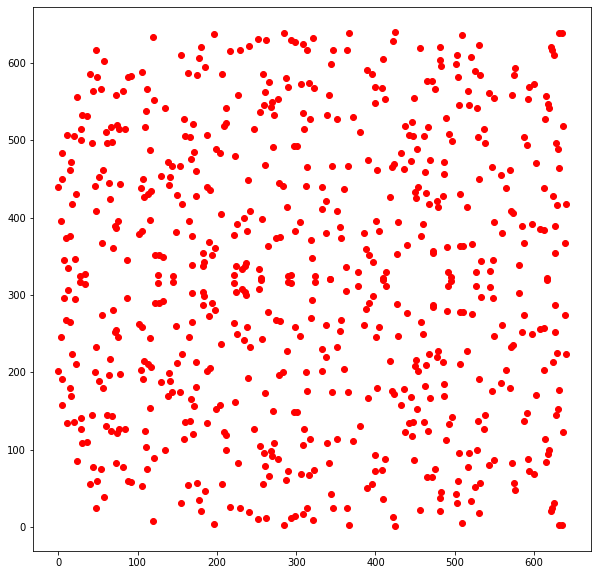

In [ ]:
def plotAndShow(points:list):
  xVals = [x[0] for x in points]
  yVals = [x[1] for x in points]

  plt.figure(figsize=(10,10))
  plt.plot(xVals, yVals, 'or')
  plt.show()

plotAndShow(plottedPoints)

# Elliptic Curve Example
---
The following will demonstrate Alice generating keys, Bob encrypting a message, and Alice decrypting the message in Elliptic Curve Cryptography simulating Elgamal.


# Key Generation
---
The scheme uses asymmetric keys. The private key is kept secret to the user, and the public key is published for others to send messages.

## Private Key
The private key is a random, positive number chosen from $[1..P-1]$

Represented as $X = $ random$([1..P-1])$



In [ ]:
# Alices randomly chosen private key
Alice_privateKey = randint(1, PRIME-1)

print(f"Alice's Private Key: {Alice_privateKey}")

Alice's Private Key: 633


## Public Key
ECC's public key comprises three parts: the equation parameters used, a random point from the graph, and the same random point encoded with the user's private key.

Represented as: $Y = (E_p(A,B), e_1, e_2)$, where

- $E_p(A, B)$ holds the parameters of the equation
  - *p* is the prime for the finite field
  - *A* and *B* are the parameters used in the ECC equation 
- $e_1$ is the random point chosen from the field
- $e_2$ is the result of $e_1 * X$



In [ ]:
# Random point from graph
Alice_e1 = plottedPoints[randint(0, len(plottedPoints)-1)]

# Random point times the private key
Alice_e2 = multiplyPoints(Alice_e1, Alice_privateKey, PRIME, A)

# Alice's public key
Alice_publicKey = ({'A':A, 'B':B, 'prime':PRIME}, Alice_e1, Alice_e2)
print(f"Alice E1 Point: {Alice_e1}\nAlice Computed E2 Point: {Alice_e2}")
print(f"Alice Full Public Key (Equations, E1, E2): {Alice_publicKey}")

Alice E1 Point: (4, 450)
Alice Computed E2 Point: (451, 216)
Alice Full Public Key (Equations, E1, E2): ({'A': 286, 'B': 18, 'prime': 641}, (4, 450), (451, 216))


#Encryption
---
Two values make up the ciphertext $C_1$ and $C_2$ that are sent as a tuple. ECC requires that these points exist on the graph. 


## Encoding Messages
Before a message can be encrypted, it must be encoded to points on the graph. This encoding can be done in different ways. This example selects a point from the graph and generates a sub-group of points from the printable ASCII characters (32 - 127). These points are then used to map the characters from the message to points on the graph.

In [ ]:
def encodeMessage(message:str, plottedPoints:list, prime:int, a:int, supress=False):
  # Hardcoded Encoding Point for Example
  encodingPoint = plottedPoints[randint(0, len(plottedPoints)-1)]
  if supress: print(f"The point from the graph, {encodingPoint}, used to generate create the mapping.")
  mapping = dict()

  # Printable Range of ASCII Table
  for x in range(32, 128):
    tempPoint = multiplyPoints(encodingPoint, x, prime, a)
    mapping[chr(x)] = tempPoint

  # Encode message with generated mapping
  plaintext = [mapping[x] for x in message]

  return plaintext, mapping


encodedExample, exampleMapping = encodeMessage(PLAINTEXT, plottedPoints, PRIME, A, True)

print(f"This function creates a mapping using ASCII values and points on the graph to encode the message:\n\nMapping:")
index = 0
for _char, _point in exampleMapping.items():
  print(f"'{_char}' {_point}", end=', ')
  if (index + 1) % 3 == 0: 
    print()
  index += 1

print(f"\n\nOriginal Message: {PLAINTEXT}\nEncoded Example: {encodedExample}")



The point from the graph, (43, 77), used to generate create the mapping.
This function creates a mapping using ASCII values and points on the graph to encode the message:

Mapping:
' ' (108, 427), '!' (409, 319), '"' (319, 371), 
'#' (504, 59), '$' (344, 598), '%' (436, 463), 
'&' (73, 559), ''' (239, 449), '(' (11, 507), 
')' (84, 514), '*' (199, 152), '+' (289, 569), 
',' (313, 24), '-' (442, 507), '.' (149, 212), 
'/' (412, 88), '0' (277, 88), '1' (461, 506), 
'2' (182, 337), '3' (60, 131), '4' (537, 126), 
'5' (346, 24), '6' (381, 511), '7' (550, 554), 
'8' (205, 404), '9' (119, 7), ':' (538, 497), 
';' (222, 315), '<' (421, 176), '=' (402, 180), 
'>' (317, 114), '?' (631, 639), '@' (173, 213), 
'A' (515, 228), 'B' (14, 265), 'C' (171, 156), 
'D' (48, 616), 'E' (479, 228), 'F' (323, 567), 
'G' (238, 383), 'H' (242, 232), 'I' (372, 530), 
'J' (174, 181), 'K' (587, 504), 'L' (299, 627), 
'M' (615, 557), 'N' (487, 169), 'O' (363, 336), 
'P' (621, 621), 'Q' (559, 380), 'R' (529, 137), 

## C1
$C_1$ is used for verification and the decryption of $C_2$. It is generated using an **r** value and the $e_1$ point from the public key. 

**r** is a random number from $[1..P-1]$. The $C_1$ value is generated by multiplying $e_1$ by **r**.

<br >

$r = [1...P-1]$

$C_1 = e_1*r$ mod $P$

\*\*For this example, some parameters are hardcoded for the example.

In [ ]:
example_R = 3
example_C1 = multiplyPoints(Alice_publicKey[1], example_R, PRIME, A)

print(f"Encoding Paramters: r * Alice_e1 = C1\nC1 = {example_R} * {Alice_publicKey[1]} = {example_C1}")

Encoding Paramters: r * Alice_e1 = C1
C1 = 3 * (4, 450) = (237, 300)


## C2
$C_2$ will hold the encrypted message. The message is encrypted using a computed secret **shared key** using **r** and the **Public Key**(Y). The secret **shared key** (s) is generated by multiplying the receiver's $e_2$ point from the public key by the **r** value modulo the **Global Prime**. Then, the shared key is added to the message to create $C_2$.

$s = e_2*r $ mod $P$

$C_2 = M+s$ mod $P$

Where *M* is the plaintext message being encrypted

If Bob wanted to send an encrypted message to Alice, he would use her **public key** when computing the **shared key**.

In [ ]:
example_sharedKey = multiplyPoints(Alice_publicKey[2], example_R, PRIME, A)

# Creating list to hold encrypted points
example_C2 = []

# Encrypting Points
for point in encodedExample:
  newPoint = addPoints(point, example_sharedKey, PRIME, A)
  if newPoint in plottedPoints:
    example_C2.append(newPoint)
    
print(f"Original Message: {PLAINTEXT}\nEncoded Message: {encodedExample}")
print(f"\n\tShared Key = e2 * R = {Alice_publicKey[2]} * {example_R} = {example_sharedKey}")
print(f"\tExample Encrypting Point = P + Shared Key = {encodedExample[0]} + {example_sharedKey} = {addPoints(encodedExample[0], example_sharedKey, PRIME, A)}")
print(f"\nEncrypted Points: {example_C2}")

Original Message: This is an example of Elliptic Curve Cryptography.
Encoded Message: [(588, 367), (477, 220), (259, 546), (339, 109), (108, 427), (259, 546), (339, 109), (108, 427), (623, 617), (33, 327), (108, 427), (309, 16), (298, 383), (623, 617), (428, 247), (465, 64), (527, 329), (309, 16), (108, 427), (549, 394), (338, 422), (108, 427), (479, 228), (527, 329), (527, 329), (259, 546), (465, 64), (576, 593), (259, 546), (464, 209), (108, 427), (171, 156), (29, 141), (460, 391), (446, 117), (309, 16), (108, 427), (171, 156), (460, 391), (404, 259), (465, 64), (576, 593), (549, 394), (117, 434), (460, 391), (623, 617), (465, 64), (477, 220), (404, 259), (149, 212)]

	Shared Key = e2 * R = (451, 216) * 3 = (506, 211)
	Example Encrypting Point = P + Shared Key = (588, 367) + (506, 211) = (290, 325)

Encrypted Points: [(290, 325), (168, 303), (360, 437), (56, 179), (558, 455), (360, 437), (56, 179), (558, 455), (145, 324), (262, 629), (558, 455), (418, 426), (450, 433), (145, 324), (4

## Full Code Encryption Code

In [ ]:
def encryptMessage(message:str, publicKey:dict, plottedPoints:list):
  prime = publicKey[0]['prime']
  a = publicKey[0]['A']
  b = publicKey[0]['B']
  
  # Encode Message
  message, mapping = encodeMessage(message, plottedPoints, prime, a)

  # Select encoding parameter
  R = 3

  # Create C1 Point
  C1 = tuple()
  C1 = multiplyPoints(publicKey[1], R , prime, a)

  # Encrypt Message
  C2 = list()
  
  # Compute shared key
  sharedKey = multiplyPoints(publicKey[2], R, prime, a)

  # Encrypt message with shared key
  for point in message:
    newPoint = addPoints(point, sharedKey, prime, a)
    if newPoint in plottedPoints:
      C2.append(newPoint)

  print("\nNow Bob will send the ciphertext pair to Alice:\n", {'C1':C1, 'C2':C2})
  return dict({'C1':C1, 'C2':C2}), mapping

print(f"Original Message: {PLAINTEXT}")
CIPHERTEXT, mapping = encryptMessage(PLAINTEXT, Alice_publicKey, plottedPoints)

Original Message: This is an example of Elliptic Curve Cryptography.

Now Bob will send the ciphertext pair to Alice:
 {'C1': (237, 300), 'C2': [(84, 514), (497, 499), (469, 475), (61, 144), (167, 476), (469, 475), (61, 144), (167, 476), (277, 553), (388, 359), (167, 476), (447, 136), (309, 625), (277, 553), (308, 106), (531, 18), (628, 145), (447, 136), (167, 476), (471, 65), (165, 245), (167, 476), (526, 51), (628, 145), (628, 145), (469, 475), (531, 18), (183, 287), (469, 475), (593, 553), (167, 476), (378, 311), (271, 491), (20, 135), (12, 335), (447, 136), (167, 476), (378, 311), (20, 135), (234, 399), (531, 18), (183, 287), (471, 65), (185, 46), (20, 135), (277, 553), (531, 18), (497, 499), (234, 399), (11, 507)]}


# Decryption 
---
Once Alice receives the encrypted message, she will use her **private key** to decrypt the ciphertext. After the message is decrypted, it is then decoded to transform the points back to characters.


## Decode Message

The same mapping is used to decode the message as was to encode the message. 

In [ ]:
def decodeMessage(message:list, mapping:dict):
  plaintext = ''

  values, keys = list(mapping.values()), list(mapping.keys())

  for point in message:
    plaintext += keys[values.index(point)]

  return plaintext.strip()

## Decryption

The message can be decrypted by recomputing the **shared key** and adding it to the $C_2$ value. The **shared key** is computed by multiplying the **private key** by the $C_1$ value. After computed, the **shared key** is then added to the encrypted message to decrypt it.

$s = C_1 * X$

$M = C_2+s$


In [ ]:
def decryptMessage(ciphertext:dict, privateKey:int, publicKey:dict, mapping:dict):
  C1 = ciphertext['C1']
  C2 = ciphertext['C2']
  prime = publicKey[0]['prime']
  A = publicKey[0]['A']
  plaintext = ""
  print(f"Ciphertext: {C2}")
  mulKey = invertPoint(multiplyPoints(C1, privateKey, prime, A), prime)
  print(f"\n\tShared Key = X * r = {Alice_privateKey} * {C1} = {mulKey}")
  print(f"\tExample Decrypting Point = C + Shared Key = {C2[0]} + {mulKey} = {addPoints(C2[0], mulKey, prime, A)}")
  for x in range(len(C2)):
    C2[x] = addPoints(mulKey, C2[x], prime, A)
  
  print("\nDecrypted Points: ",C2)
  return decodeMessage(C2, mapping)

decryptedText = decryptMessage(CIPHERTEXT, Alice_privateKey, Alice_publicKey, mapping)
print(f"Decrypted Message: {decryptedText}")

Ciphertext: [(84, 514), (497, 499), (469, 475), (61, 144), (167, 476), (469, 475), (61, 144), (167, 476), (277, 553), (388, 359), (167, 476), (447, 136), (309, 625), (277, 553), (308, 106), (531, 18), (628, 145), (447, 136), (167, 476), (471, 65), (165, 245), (167, 476), (526, 51), (628, 145), (628, 145), (469, 475), (531, 18), (183, 287), (469, 475), (593, 553), (167, 476), (378, 311), (271, 491), (20, 135), (12, 335), (447, 136), (167, 476), (378, 311), (20, 135), (234, 399), (531, 18), (183, 287), (471, 65), (185, 46), (20, 135), (277, 553), (531, 18), (497, 499), (234, 399), (11, 507)]

	Shared Key = X * r = 633 * (237, 300) = (506, 430)
	Example Decrypting Point = C + Shared Key = (84, 514) + (506, 430) = (259, 95)

Decrypted Points:  [(259, 95), (409, 322), (485, 428), (138, 472), (360, 437), (485, 428), (138, 472), (360, 437), (517, 564), (104, 203), (360, 437), (252, 10), (418, 215), (517, 564), (423, 172), (533, 297), (274, 268), (252, 10), (360, 437), (453, 489), (40, 586), (

# Conclusion
---

The following has been a demonstration of the Elliptic Curve Cryptography scheme simulating the Elgamal PKC.  

# Resources
1. https://en.wikipedia.org/wiki/Elliptic_Curve_Digital_Signature_Algorithm 
1. https://www.geeksforgeeks.org/multiplicative-inverse-under-modulo-m/ 
1. https://cryptobook.nakov.com/asymmetric-key-ciphers/ecc-encryption-decryption 
1. https://qvault.io/2019/12/31/very-basic-intro-to-elliptic-curve-cryptography/ 
1. https://en.wikipedia.org/wiki/Modular_arithmetic 